# 1. Limpiar los valores faltantes en el archivo CSV

En Pandas, un valor faltante generalmente se indica con NaN, ya que se basa en el paquete NumPy y es el valor NaN especial de punto flotante específico de NumPy.

# Encontrar valores perdidos

Primero veamos cómo podemos encontrar si falta un valor en nuestros datos.

# Enfoque 1: visualmente

<Axes: >

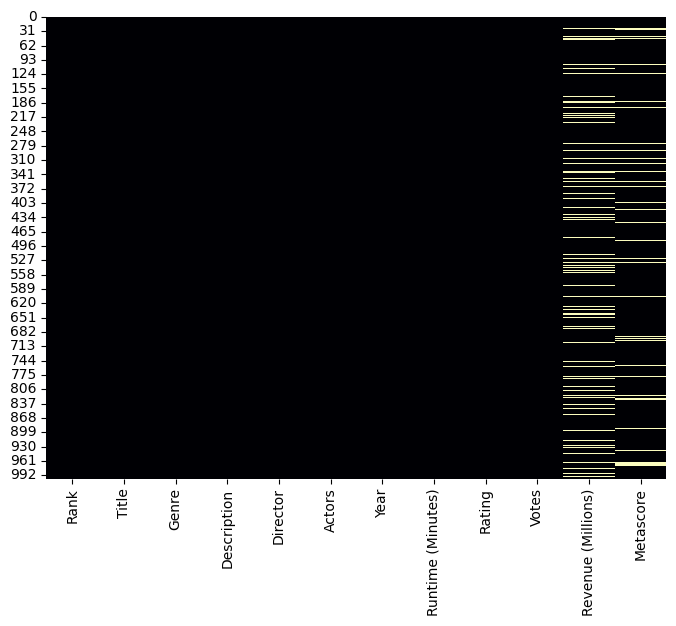

In [8]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
 
#importing Dataset
df = pd.read_csv('/workspaces/codespaces-jupyter/data/IMDB-Movie-Data.csv')
 
#Creating the heatmap
plt.figure(figsize = (8,6))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')

# Enfoque 2: Podemos usar el método .sum() después de aplicar .isnull(), esto devolverá la suma de los valores faltantes dentro de cada columna en el marco de datos.

In [9]:
import pandas as pd
 
#importing dataset
df = pd.read_csv('/workspaces/codespaces-jupyter/data/IMDB-Movie-Data.csv')
 
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

# Limpiar valores faltantes de datos

Descubrimos que a nuestro conjunto de datos le faltan algunos valores, ¿qué debemos hacer a continuación para obtener datos limpios?

Podemos eliminar las filas y columnas que contienen valores faltantes o reemplazar los valores faltantes con el valor apropiado, es decir, media, mediana o moda.

1. Eliminar valores faltantes:

El código siguiente eliminará las filas del dataframe que tengan valores faltantes.

In [10]:
#imporing pandas
import pandas as pd
 
#Importing dataset
df = pd.read_csv('/workspaces/codespaces-jupyter/data/IMDB-Movie-Data.csv')
 
#Size of original dataset
print(df.shape)
 
#Dropping the missing rows.
df_dropped = df.dropna(how = 'any')

(1000, 12)


Veamos el método .dropna() en detalle:

1. df.dropna(): descarta todas las filas que tengan valores NaN
2. df.dropna(how=’all’): eliminar solo si TODAS las columnas son NaN
3. df.dropna(thresh=2): elimina la fila si no tiene al menos dos valores que no sean NaN
4. df.dropna(subset=[1]) – Eliminar solo si NaN en una columna específica

Se debe tener cuidado al considerar eliminar los valores faltantes, ya que podría afectar la calidad del conjunto de datos.


2. Reemplazo de valores faltantes

In [22]:
import pandas as pd
 
#importing the dataset
df = pd.read_csv('/workspaces/codespaces-jupyter/data/IMDB-Movie-Data.csv')
 
#Creating a copy of dataframe
df_new = df
 
df_new['Metascore'] = df_new['Metascore'].fillna((df_new['Metascore'].mean()))
 
#printing the dataframes after replacing null values
print(df_new.isna().sum())
print(df.isna().sum())

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore               0
dtype: int64
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore               0
dtype: int64


El módulo Pandas tiene el método .fillna(), que acepta un valor que queremos reemplazar en lugar de valores NaN. Simplemente calculamos la media de la columna y la pasamos como argumento de entrada al método fillna().

# 2. Limpiando valores atípicos

Los valores atípicos pueden cambiar el curso de predicciones enteras, por lo que es esencial que los detectemos y eliminemos.

Usando Z-Score

Detectemos valores atípicos en la columna Votos de nuestro conjunto de datos y filtremos los valores atípicos utilizando Z-Score.

La idea detrás de este método radica en el hecho de que los valores que se encuentran a 3 desviaciones estándar de la media se denominarán valores atípicos.

In [21]:
#importing required modules
import pandas as pd
import numpy as np
from scipy import stats
 
#importing dataset
df = pd.read_csv('/workspaces/codespaces-jupyter/data/IMDB-Movie-Data.csv')
 
#filtering outliers
df_new = df[(np.abs(stats.zscore(df.Votes)) < 3)]
df_new

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


La columna sobre la que se aplica este método debe ser una variable numérica y no categórica.

Usando Cuantiles

Mediante este método, se filtrarán los valores que caigan por debajo de 0,01 cuantiles y por encima de 0,99 cuantiles en la serie.

In [20]:
#importing required modules
import pandas as pd
import numpy as np
from scipy import stats
 
#importing dataset
df = pd.read_csv('/workspaces/codespaces-jupyter/data/IMDB-Movie-Data.csv')
 
#Selecting limits
q_low = df["Votes"].quantile(0.01)
q_hi  = df["Votes"].quantile(0.99)
 
#filtering outliers
df_filtered = df[(df["Votes"] < q_hi) & (df["Votes"] > q_low)]
df_filtered

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# 3. Manejo de entradas duplicadas

Podemos verificar si hay duplicados en un DataFrame usando el método .duplicated(). Esto devuelve una serie Pandas y no un DataFrame.

Para verificar valores duplicados en una columna específica, podemos proporcionar el nombre de la columna como argumento de entrada en el método .duplicated().

Afortunadamente, no tenemos valores duplicados en nuestro DataFrame, por lo que agregaremos algunos valores del propio DataFrame para crear valores duplicados.

In [15]:
#Import the required modules
import pandas as pd
import numpy as np
 
#importing and appending similar rows to of the dataframe
df = pd.read_csv('/workspaces/codespaces-jupyter/data/IMDB-Movie-Data.csv')
df1 = df.append(df.iloc[20:30,:])
 
df1.duplicated().sum()

/tmp/ipykernel_2369/1872617231.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df.append(df.iloc[20:30,:])


10

Ahora, el método .drop_duplicates() se utiliza para eliminar los valores duplicados del DataFrame.

In [2]:
#Importing the required modules
#Import the required modules
import pandas as pd
import numpy as np
 
#importing and appending similar rows to of the dataframe
df = pd.read_csv('/workspaces/repos/Semana_05/data_base_1.csv')
df1 = df.append(df.iloc[20:30,:])
 
#dropping the duplicates
df1 = df1.drop_duplicates()
 
#checking the duplicates 
df1.duplicated().sum()

AttributeError: 'DataFrame' object has no attribute 'append'